In [1]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
df_path = "/Users/tomii/tmp/AnalysisResult/pv_stim_pandas.csv"

In [3]:
df = pd.read_csv(df_path)

In [4]:
data = np.zeros([len(df), 4])

def phase_comp(p):
    return math.atan2(np.absolute(np.sin(p)), np.absolute(np.cos(p)))

for i in range(len(df)):
    s = df.loc[i,:]    

    theta_1 = s.stim_phase
    vec_pre = (s.stim_x - s.pre_x) + 1j*(s.stim_y - s.pre_y)
    theta_2 = phase_comp(np.angle(vec_pre) - s.fb_angle)
    shift = np.abs(((s.pst_x - s.pre_x) + 1j*(s.pst_y - s.pre_y)))
    
    d = np.array([theta_1, np.abs(vec_pre), theta_2, shift])
    data[i,:] = d
    #print i, s.sample, s.session, d

#plt.hist(data[:,3], np.arange(1,40,2))
#plt.title("histogram of sprial shift distance")
#plt.show()

In [5]:
thre = 20
step_t1 = 8
step_t2 = 4
step_l = 3

success =(data[:,3] > thre) * 1.0
theta_1 = ( ( data[:,0]+np.pi) / ( np.pi / (step_t1/2) ) ).astype(np.int8)
theta_2 = (data[:,2] / ( np.pi / (2*step_t2) ) ).astype(np.int8)
l = (data[:,1] / ((np.max(data[:,1])+step_l)/step_l)).astype(np.int8)

In [6]:
data_num = np.zeros((step_t1, step_t2, step_l))
data_suc = np.zeros((step_t1, step_t2, step_l))
for n , s in enumerate(success):
    i = theta_1[n]
    j = theta_2[n]
    k = l[n]
    
    data_num[i, j, k] += 1
    if s > 0: data_suc[i, j, k] += 1

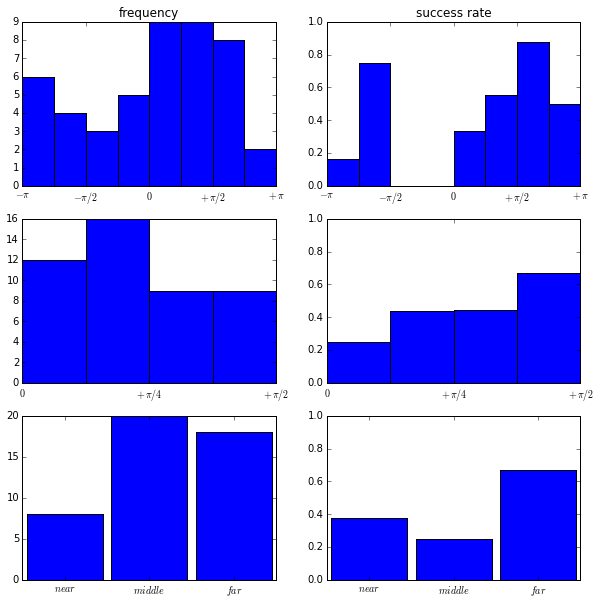

In [30]:
plt.figure(figsize=(10,10))

num = np.sum(data_num, axis=(1,2))
suc = np.sum(data_suc, axis=(1,2))
plt.subplot(3,2,1)
plt.bar(np.arange(-np.pi, np.pi, 2.*np.pi/step_t1), num, width=2.*np.pi/step_t1)
plt.xlim([-np.pi, np.pi])
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
          [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.title("frequency")
plt.subplot(3,2,2)
plt.bar(np.arange(-np.pi, np.pi, 2.*np.pi/step_t1), (suc/(num+((num==0)*1))), width=2.*np.pi/step_t1)
plt.xlim([-np.pi, np.pi])
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
          [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.ylim([0,1])
plt.title("success rate")

num = np.sum(data_num, axis=(0,2))
suc = np.sum(data_suc, axis=(0,2))
plt.subplot(3,2,3)
plt.bar(np.arange(0, .5*np.pi, .5*np.pi/step_t2), num, width=.5*np.pi/step_t2)
plt.xlim([0, .5*np.pi])
plt.xticks([0, np.pi/4, np.pi/2],
          [r'$0$', r'$+\pi/4$', r'$+\pi/2$'])
plt.subplot(3,2,4)
plt.bar(np.arange(0, .5*np.pi, .5*np.pi/step_t2), (suc/(num+((num==0)*1))), width=.5*np.pi/step_t2)
plt.xlim([0, .5*np.pi])
plt.xticks([0, np.pi/4, np.pi/2],
          [r'$0$', r'$+\pi/4$', r'$+\pi/2$'])
plt.ylim([0,1])


num = np.sum(data_num, axis=(0,1))
suc = np.sum(data_suc, axis=(0,1))
plt.subplot(3,2,5)
plt.bar(np.arange(step_l), num, width=0.9, align='center')
plt.xticks([0, 1, 2],
          [r'$near$', r'$middle$', r'$far$'])
plt.subplot(3,2,6)
plt.bar(np.arange(step_l), (suc/(num+((num==0)*1))), width=0.9, align='center')
plt.ylim([0,1])
plt.xticks([0, 1, 2],
          [r'$near$', r'$middle$', r'$far$'])

plt.show()
